## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_04-10-08-23.csv', firstRow=720, lastRow=726)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_040823_S721-726.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=52s and ended at t=462s; mass=45.88295000000001g
This equals a volume of 45.975m; expected was 45.823mL; error is 0.331%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.00175 g/s and for 2nd derivative = 0.00037499999999999995 g/s^2


<IPython.core.display.Javascript object>


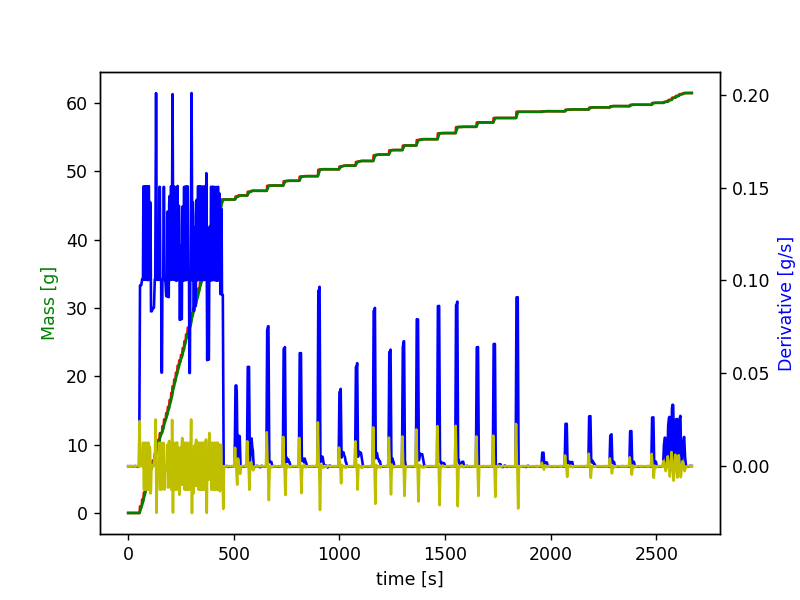

Addition of 0.595g Texapon SB 3 KC detected from 500s to 536s - expected volume = 0.515mL and actual volume = 0.538mL (resulting error is 4.386%)
Addition of 0.686g Texapon SB 3 KC detected from 560s to 598s - expected volume = 0.515mL and actual volume = 0.619mL (resulting error is 20.263%)
Addition of 0.776g Plantapon ACG 50 detected from 652s to 684s - expected volume = 0.769mL and actual volume = 0.689mL (resulting error is 10.404%)
Addition of 0.7g Plantapon ACG 50 detected from 730s to 770s - expected volume = 0.569mL and actual volume = 0.623mL (resulting error is 9.609%)
Addition of 0.679g Plantapon ACG 50 detected from 806s to 848s - expected volume = 0.569mL and actual volume = 0.604mL (resulting error is 6.228%)
Addition of 1.014g Plantapon ACG 50 detected from 894s to 930s - expected volume = 0.878mL and actual volume = 0.899mL (resulting error is 2.341%)
Addition of 0.539g Plantapon LC 7 detected from 994s to 1038s - expected volume = 0.61mL and actual volume = 0.512mL (re

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0021875 g/s and for 2nd derivative = 0.000546875 g/s^2


<IPython.core.display.Javascript object>


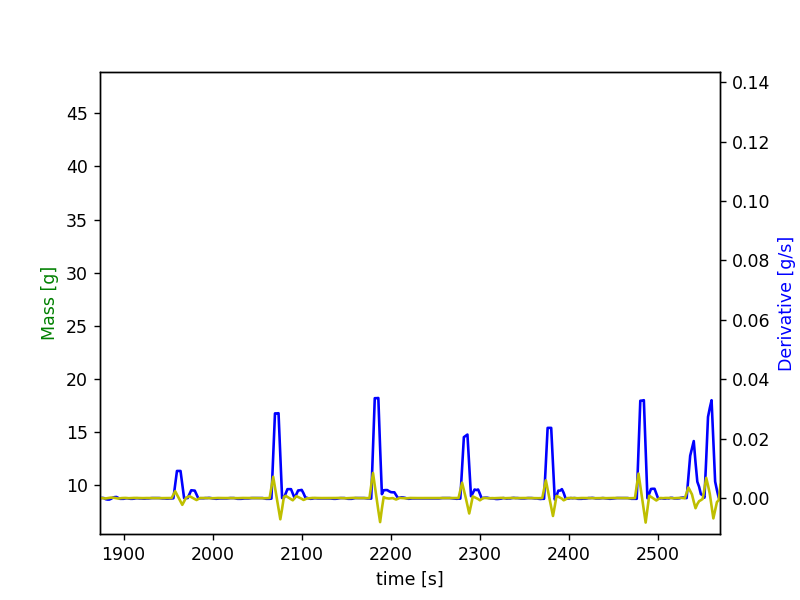

Addition of 0.092g Salcare Super 7 detected from 1954s to 1986s - expected volume = 0.109mL and actual volume = 0.084mL (resulting error is 23.021%)
Addition of 0.273g Salcare Super 7 detected from 2064s to 2106s - expected volume = 0.253mL and actual volume = 0.248mL (resulting error is 1.799%)
Addition of 0.299g Salcare Super 7 detected from 2176s to 2202s - expected volume = 0.263mL and actual volume = 0.271mL (resulting error is 3.19%)
Addition of 0.191g Salcare Super 7 detected from 2276s to 2304s - expected volume = 0.13mL and actual volume = 0.174mL (resulting error is 33.654%)
Addition of 0.207g Salcare Super 7 detected from 2370s to 2398s - expected volume = 0.164mL and actual volume = 0.188mL (resulting error is 14.931%)
Addition of 0.285g Salcare Super 7 detected from 2474s to 2502s - expected volume = 0.247mL and actual volume = 0.258mL (resulting error is 4.733%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


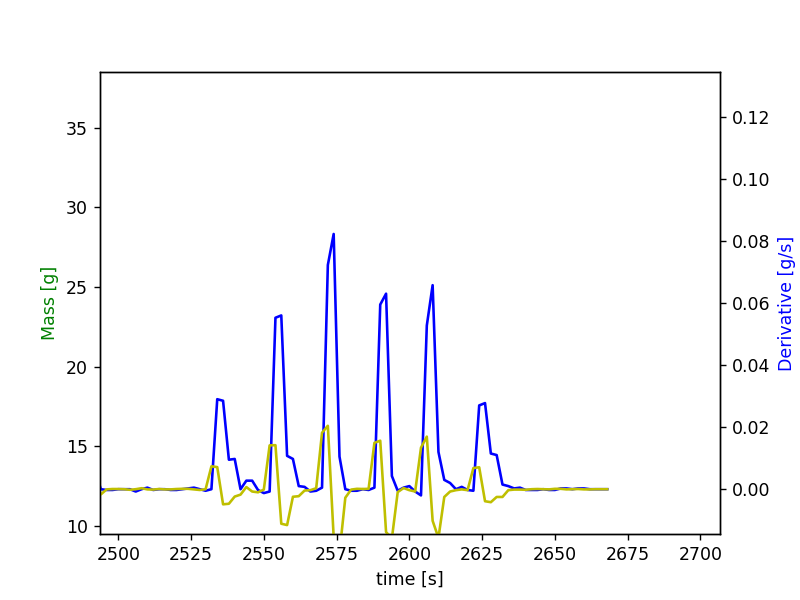

Addition of 0.163g Arlypon TT detected from 2530s to 2546s - expected volume = 0.141mL and actual volume = 0.171mL (resulting error is 21.111%)
Addition of 0.261g Arlypon TT detected from 2550s to 2566s - expected volume = 0.242mL and actual volume = 0.274mL (resulting error is 13.478%)
Addition of 0.326g Arlypon TT detected from 2568s to 2582s - expected volume = 0.299mL and actual volume = 0.342mL (resulting error is 14.561%)
Addition of 0.254g Arlypon TT detected from 2586s to 2598s - expected volume = 0.179mL and actual volume = 0.267mL (resulting error is 49.412%)
Addition of 0.267g Arlypon TT detected from 2602s to 2616s - expected volume = 0.223mL and actual volume = 0.281mL (resulting error is 26.179%)
Addition of 0.16g Arlypon TT detected from 2620s to 2636s - expected volume = 0.106mL and actual volume = 0.168mL (resulting error is 58.416%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2490,2506,2522,2538,2554,2568,2588])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_040823_S721-S726.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_21400\3325684942.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
720,721.0,0.00000,0.000000,12.185900,0.0,0.0,8.892737,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.920720,0.0,1.629637
721,722.0,0.00000,7.696688,9.390971,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,2.708075,0.0,2.589039
722,723.0,0.00000,0.000000,12.711987,0.0,0.0,8.822142,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,2.859337,0.0,3.119711
723,724.0,12.33111,0.000000,8.899007,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.840518,0.0,2.445999
724,725.0,0.00000,13.289433,0.000000,0.0,0.0,0.000000,0.0,0.0,12.49835,0.0,0.000000,0.0,0.0,0.0,0.0,1.993367,0.0,2.577526
725,726.0,0.00000,9.896897,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,8.864466,0.0,0.0,0.0,0.0,2.779904,0.0,1.561333
